# Chart Pattern and Indicators : “Pattern and Indicator Mastery”

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
tatam=yf.Ticker("TATAMOTORS.NS")
tatam_data=tatam.history(start="2018-04-01",end="2023-03-31")

In [ ]:
df = tatam_data
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df["Open"],
                high=df["High"],
                low=df["Low"],
                close=df["Close"])])
fig.update_layout(xaxis_rangeslider_visible=True,
                  title='Candlestick plot of stocks of Tata Motors from Apr 2018 to March 2023',
                  yaxis_title='Tata Motors Stocks'
                  )
fig.show()

In [ ]:
df['Date'] = pd.to_datetime(df.index)
df.index= df['Date'].dt.date

In [ ]:
arr=np.arange(0,len(df.index))
df['index']=arr
df.set_index('index')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
index,,,,,,,,
0,335.000000,340.799988,332.700012,339.149994,9874486,0.0,0.0,2018-04-02 00:00:00+05:30
1,338.399994,344.500000,337.149994,343.100006,6989584,0.0,0.0,2018-04-03 00:00:00+05:30
2,346.799988,363.700012,346.250000,355.600006,27157199,0.0,0.0,2018-04-04 00:00:00+05:30
3,362.600006,372.350006,359.799988,362.200012,28886070,0.0,0.0,2018-04-05 00:00:00+05:30
4,362.000000,368.350006,356.450012,364.100006,13297051,0.0,0.0,2018-04-06 00:00:00+05:30
...,...,...,...,...,...,...,...,...
1232,416.000000,422.500000,416.000000,419.149994,9817460,0.0,0.0,2023-03-23 00:00:00+05:30
1233,419.000000,420.549988,414.799988,416.500000,6877960,0.0,0.0,2023-03-24 00:00:00+05:30
1234,416.000000,418.500000,410.250000,412.049988,7433933,0.0,0.0,2023-03-27 00:00:00+05:30


# Different Candlestick Bullish Patterns:

In [ ]:
def bullish_engulfing_dates(df):
    bullish_dates = []
    for index in range(1, len(df)):
        if (
            df['Close'][index] > df['Open'][index] and
            df['Open'][index-1] > df['Close'][index-1] and
            df['Close'][index-1] > df['Open'][index] and
            df['Open'][index-1] < df['Close'][index]
        ):
            bullish_dates.append(df['Date'][index].date())
    return bullish_dates

In [ ]:
def three_white_soldiers_dates(df):
    three_white_soldiers_dates = []
    for index in range(1, len(df)):
        if ((df['Close'][index] > df['Open'][index]) and
       (df['Close'][index-1] > df['Open'][index-1]) and
       (df['Close'][index-2] > df['Open'][index-2]) and
       (df['Close'][index] > df['Close'][index-1] > df['Close'][index-2]) and
       (df['Open'][index] > df['Open'][index-1] > df['Open'][index-2])
        ):
            three_white_soldiers_dates.append(df['Date'][index].date())
    return three_white_soldiers_dates

In [ ]:
def hammer_dates(df):
  hammer_dates=[]
  for index in range(1,len(df)):
      if (df['Close'][index] > df['Open'][index] and
        (df['Close'][index] - df['Low'][index]) > 2 * (df['High'][index] - df['Close'][index])):
          hammer_dates.append(df['Date'][index].date())
  return hammer_dates

In [ ]:
def piercing_dates(df):
    piercing_dates = []
    for index in range(1, len(df)):
        if ((df['Close'][index] > df['Open'][index]) &
       (df['Close'][index-1] < df['Open'][index-1]) &
       (df['Open'][index] < df['Low'][index-1]) &
       (df['Close'][index] > (df['Open'][index-1] + df['Close'][index-1]) / 2)
        ):
            piercing_dates.append(df['Date'][index].date())
    return piercing_dates

In [ ]:
bullish_engulfing=bullish_engulfing_dates(df)
bullish_engulfing

[datetime.date(2018, 4, 6),
 datetime.date(2018, 5, 9),
 datetime.date(2018, 6, 18),
 datetime.date(2018, 6, 22),
 datetime.date(2018, 8, 31),
 datetime.date(2018, 11, 9),
 datetime.date(2019, 5, 17),
 datetime.date(2019, 8, 20),
 datetime.date(2019, 10, 3),
 datetime.date(2019, 10, 31),
 datetime.date(2019, 11, 25),
 datetime.date(2020, 3, 25),
 datetime.date(2020, 5, 20),
 datetime.date(2020, 8, 12),
 datetime.date(2020, 10, 22),
 datetime.date(2021, 1, 5),
 datetime.date(2021, 6, 2),
 datetime.date(2021, 8, 27),
 datetime.date(2021, 9, 3),
 datetime.date(2022, 7, 21),
 datetime.date(2023, 2, 15)]

In [ ]:
hammer=hammer_dates(df)
hammer

[datetime.date(2018, 4, 3),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 27),
 datetime.date(2018, 5, 9),
 datetime.date(2018, 5, 22),
 datetime.date(2018, 5, 25),
 datetime.date(2018, 6, 6),
 datetime.date(2018, 6, 7),
 datetime.date(2018, 6, 18),
 datetime.date(2018, 6, 22),
 datetime.date(2018, 6, 29),
 datetime.date(2018, 7, 6),
 datetime.date(2018, 7, 17),
 datetime.date(2018, 7, 20),
 datetime.date(2018, 7, 23),
 datetime.date(2018, 7, 27),
 datetime.date(2018, 8, 1),
 datetime.date(2018, 8, 16),
 datetime.date(2018, 8, 17),
 datetime.date(2018, 8, 20),
 datetime.date(2018, 8, 27),
 datetime.date(2018, 8, 31),
 datetime.date(2018, 9, 5),
 datetime.date(2018, 9, 6),
 datetime.date(2018, 9, 7),
 datetime.date(2018, 10, 1),
 datetime.date(2018, 10, 29),
 datetime.date(2018, 10, 31),
 datetime.date(2018, 11, 2),
 datetime.date(2018, 11, 19),
 datetime.date(2018, 12, 3),
 datetime.date(2018, 12, 11),
 datetime.date(2018, 12, 12),
 datetime.date(2018, 12, 17),
 datetime.date(20

In [ ]:
three_white_soldiers=three_white_soldiers_dates(df)
three_white_soldiers

[datetime.date(2018, 4, 4),
 datetime.date(2018, 4, 30),
 datetime.date(2018, 6, 8),
 datetime.date(2018, 7, 24),
 datetime.date(2018, 8, 20),
 datetime.date(2018, 10, 30),
 datetime.date(2018, 10, 31),
 datetime.date(2018, 12, 13),
 datetime.date(2018, 12, 18),
 datetime.date(2019, 1, 8),
 datetime.date(2019, 1, 9),
 datetime.date(2019, 1, 10),
 datetime.date(2019, 1, 31),
 datetime.date(2019, 2, 18),
 datetime.date(2019, 2, 22),
 datetime.date(2019, 2, 25),
 datetime.date(2019, 4, 2),
 datetime.date(2019, 4, 11),
 datetime.date(2019, 6, 27),
 datetime.date(2019, 7, 15),
 datetime.date(2019, 7, 16),
 datetime.date(2019, 9, 9),
 datetime.date(2019, 9, 11),
 datetime.date(2019, 12, 31),
 datetime.date(2020, 1, 10),
 datetime.date(2020, 4, 30),
 datetime.date(2020, 6, 2),
 datetime.date(2020, 6, 19),
 datetime.date(2020, 6, 22),
 datetime.date(2020, 6, 23),
 datetime.date(2020, 7, 3),
 datetime.date(2020, 7, 6),
 datetime.date(2020, 8, 7),
 datetime.date(2020, 8, 10),
 datetime.date(2020

In [ ]:
piercing=piercing_dates(df)
piercing

[datetime.date(2018, 11, 9),
 datetime.date(2019, 5, 3),
 datetime.date(2019, 5, 14),
 datetime.date(2019, 10, 3),
 datetime.date(2020, 3, 13),
 datetime.date(2020, 4, 16),
 datetime.date(2020, 5, 20),
 datetime.date(2020, 8, 12),
 datetime.date(2021, 1, 5),
 datetime.date(2021, 6, 2),
 datetime.date(2022, 6, 28),
 datetime.date(2022, 9, 22)]

# Different Candlestick Bearish Patterns:

In [ ]:
def bearish_engulfing_dates(df):
    bearish_dates = []
    for index in range(1, len(df)):
        if (
           (df['Close'][index] < df['Open'][index] and df['Open'][index-1] < df['Close'][index-1]) and
       (df['Close'][index-1] < df['Open'][index] and df['Open'][index-1] > df['Close'][index])
        ):
            bearish_dates.append(df['Date'][index].date())
    return bearish_dates

In [ ]:
def three_black_crows_dates(df):
    three_black_crows_dates = []
    for index in range(1, len(df)):
        if ((df['Close'][index] < df['Open'][index]) and
       (df['Close'][index-1] < df['Open'][index-1]) and
       (df['Close'][index-2] < df['Open'][index-2]) and
       (df['Close'][index] < df['Close'][index-1] < df['Close'][index-2]) and
       (df['Open'][index] < df['Open'][index-1] < df['Open'][index-2])
        ):
            three_black_crows_dates.append(df['Date'][index].date())
    return three_black_crows_dates

In [ ]:
def dark_cloud_cover_dates(df):
    dark_cloud_cover_dates = []
    for index in range(1, len(df)):
        if ((df['Close'][index] < df['Open'][index]) and
       (df['Close'][index-1] > df['Open'][index-1]) and
       (df['Open'][index] > df['High'][index-1]) and
       (df['Close'][index] < (df['Open'][index-1] + df['Close'][index-1]) / 2)
        ):
            dark_cloud_cover_dates.append(df['Date'][index].date())
    return dark_cloud_cover_dates

In [ ]:
def hanging_man_dates(df):
  hanging_man_dates=[]
  for index in range(1,len(df)):
      if ((df['Close'][index] < df['Open'][index]) and
        (df['Open'][index] - df['Low'][index] > 2 * (df['High'][index] - df['Open'][index]))):
          hanging_man_dates.append(df['Date'][index].date())
  return hanging_man_dates

In [ ]:
bearish_engulfing=bearish_engulfing_dates(df)
bearish_engulfing

[datetime.date(2018, 5, 2),
 datetime.date(2018, 7, 11),
 datetime.date(2018, 7, 18),
 datetime.date(2018, 7, 25),
 datetime.date(2018, 8, 30),
 datetime.date(2018, 10, 17),
 datetime.date(2018, 12, 19),
 datetime.date(2019, 1, 11),
 datetime.date(2019, 3, 20),
 datetime.date(2019, 3, 27),
 datetime.date(2019, 4, 12),
 datetime.date(2019, 5, 15),
 datetime.date(2019, 5, 23),
 datetime.date(2019, 6, 14),
 datetime.date(2019, 7, 10),
 datetime.date(2019, 9, 17),
 datetime.date(2019, 11, 7),
 datetime.date(2019, 12, 3),
 datetime.date(2019, 12, 18),
 datetime.date(2020, 1, 20),
 datetime.date(2020, 6, 9),
 datetime.date(2020, 7, 22),
 datetime.date(2020, 10, 26),
 datetime.date(2020, 11, 25),
 datetime.date(2020, 12, 14),
 datetime.date(2021, 1, 18),
 datetime.date(2021, 2, 16),
 datetime.date(2021, 2, 18),
 datetime.date(2021, 3, 12),
 datetime.date(2021, 4, 29),
 datetime.date(2021, 5, 14),
 datetime.date(2021, 5, 20),
 datetime.date(2021, 5, 24),
 datetime.date(2021, 6, 1),
 datetime.d

In [ ]:
three_black_crows=three_black_crows_dates(df)
three_black_crows

[datetime.date(2018, 4, 17),
 datetime.date(2018, 4, 18),
 datetime.date(2018, 4, 19),
 datetime.date(2018, 4, 25),
 datetime.date(2018, 5, 14),
 datetime.date(2018, 5, 15),
 datetime.date(2018, 6, 15),
 datetime.date(2018, 6, 27),
 datetime.date(2018, 6, 28),
 datetime.date(2018, 7, 13),
 datetime.date(2018, 7, 16),
 datetime.date(2018, 8, 6),
 datetime.date(2018, 8, 7),
 datetime.date(2018, 8, 24),
 datetime.date(2018, 9, 28),
 datetime.date(2018, 10, 5),
 datetime.date(2018, 10, 8),
 datetime.date(2018, 10, 9),
 datetime.date(2018, 10, 22),
 datetime.date(2018, 11, 14),
 datetime.date(2018, 11, 27),
 datetime.date(2018, 11, 28),
 datetime.date(2018, 12, 6),
 datetime.date(2018, 12, 26),
 datetime.date(2019, 1, 3),
 datetime.date(2019, 1, 21),
 datetime.date(2019, 1, 22),
 datetime.date(2019, 1, 25),
 datetime.date(2019, 1, 28),
 datetime.date(2019, 2, 5),
 datetime.date(2019, 3, 25),
 datetime.date(2019, 4, 25),
 datetime.date(2019, 4, 26),
 datetime.date(2019, 4, 30),
 datetime.dat

In [ ]:
hanging_man=hanging_man_dates(df)
hanging_man

[datetime.date(2018, 4, 10),
 datetime.date(2018, 4, 16),
 datetime.date(2018, 4, 17),
 datetime.date(2018, 4, 18),
 datetime.date(2018, 4, 19),
 datetime.date(2018, 4, 24),
 datetime.date(2018, 5, 2),
 datetime.date(2018, 5, 3),
 datetime.date(2018, 5, 7),
 datetime.date(2018, 5, 8),
 datetime.date(2018, 5, 10),
 datetime.date(2018, 5, 11),
 datetime.date(2018, 5, 14),
 datetime.date(2018, 5, 15),
 datetime.date(2018, 5, 18),
 datetime.date(2018, 5, 21),
 datetime.date(2018, 5, 24),
 datetime.date(2018, 5, 31),
 datetime.date(2018, 6, 4),
 datetime.date(2018, 6, 14),
 datetime.date(2018, 6, 15),
 datetime.date(2018, 6, 21),
 datetime.date(2018, 6, 25),
 datetime.date(2018, 6, 26),
 datetime.date(2018, 6, 27),
 datetime.date(2018, 6, 28),
 datetime.date(2018, 7, 2),
 datetime.date(2018, 7, 4),
 datetime.date(2018, 7, 5),
 datetime.date(2018, 7, 11),
 datetime.date(2018, 7, 13),
 datetime.date(2018, 7, 16),
 datetime.date(2018, 7, 18),
 datetime.date(2018, 7, 25),
 datetime.date(2018, 7

In [ ]:
dark_cloud_cover=dark_cloud_cover_dates(df)
dark_cloud_cover

[datetime.date(2018, 5, 2),
 datetime.date(2018, 7, 2),
 datetime.date(2018, 7, 18),
 datetime.date(2018, 10, 17),
 datetime.date(2019, 2, 27),
 datetime.date(2019, 3, 27),
 datetime.date(2019, 5, 23),
 datetime.date(2019, 11, 26),
 datetime.date(2019, 12, 18),
 datetime.date(2019, 12, 20),
 datetime.date(2020, 10, 28),
 datetime.date(2020, 12, 17),
 datetime.date(2021, 3, 12),
 datetime.date(2021, 4, 20),
 datetime.date(2021, 5, 4),
 datetime.date(2021, 8, 4),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 4, 19),
 datetime.date(2022, 5, 25),
 datetime.date(2022, 6, 16),
 datetime.date(2022, 8, 25),
 datetime.date(2022, 10, 14),
 datetime.date(2023, 1, 12),
 datetime.date(2023, 2, 1)]

# Bollinger Bands

In [ ]:
df['mavg']=df['Close'].rolling(window=20).mean()
df['std']=df['Close'].rolling(window=20).std()
df['std+2']=df['mavg']+2*df['std']
df['std-2']=df['mavg']-2*df['std']
df['Z_Sc']=(df['Close']-df['mavg'])/df['std']

In [ ]:
df = tatam_data
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df["Open"],
                high=df["High"],
                low=df["Low"],
                close=df["Close"])])
fig.update_layout(xaxis_rangeslider_visible=False,
                  title='Candlestick plot of stocks of Tata Motors from Apr 2018 to March 2023',
                  yaxis_title='Tata Motors Stocks',
                  xaxis_title='Date'
                  )
fig.show()

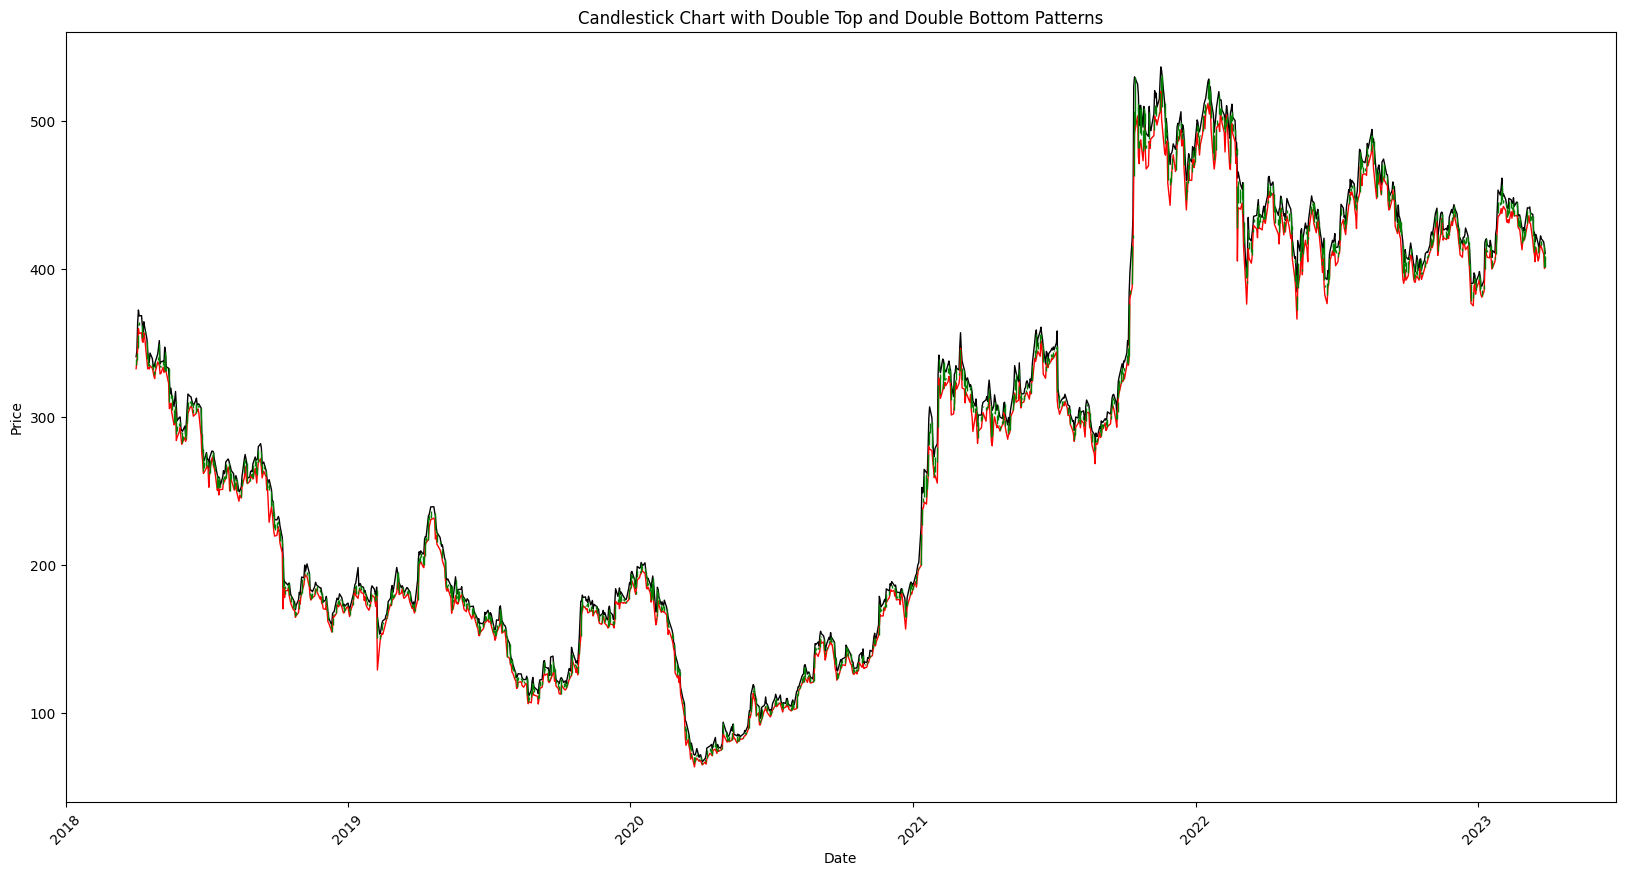

In [ ]:
df['Date'] = pd.to_datetime(df.index)

df['Midpoint'] = (df['High'] + df['Low']) / 2

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Date'], df['High'], color='black', linestyle='-', linewidth=1)
ax.plot(df['Date'], df['Low'], color='red', linestyle='-', linewidth=1)
ax.vlines(df['Date'], df['Open'], df['Close'], color='green', linewidth=1)
#ax.scatter(df['Date'], df['Midpoint'], color='blue')

double_top_indices = []
for i in range(1, len(df)-2):
    if ((df['Midpoint'].iloc[i] > df['Midpoint'].iloc[i-1]) and (df['Midpoint'].iloc[i] > df['Midpoint'].iloc[i+1])
            and df['Midpoint'].iloc[i] == df['Midpoint'].iloc[i+2]):
        double_top_indices.append(i)

double_bottom_indices = []
for i in range(1, len(df)-2):
    if ((df['Midpoint'].iloc[i] < df['Midpoint'].iloc[i-1]) and (df['Midpoint'].iloc[i] < df['Midpoint'].iloc[i+1])
            and (df['Midpoint'].iloc[i] == df['Midpoint'].iloc[i+2])):
        double_bottom_indices.append(i)

for index in double_top_indices:
    ax.annotate('Double Top', xy=(df['Date'].iloc[index], df['Midpoint'].iloc[index]), xytext=(10, -20),
                textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

for index in double_bottom_indices:
    ax.annotate('Double Bottom', xy=(df['Date'].iloc[index], df['Midpoint'].iloc[index]), xytext=(10, 30),
                textcoords='offset points', arrowprops=dict(arrowstyle='->', color='green'))

ax.xaxis_date()

plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Chart with Double Top and Double Bottom Patterns')

plt.show()

In [ ]:
pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


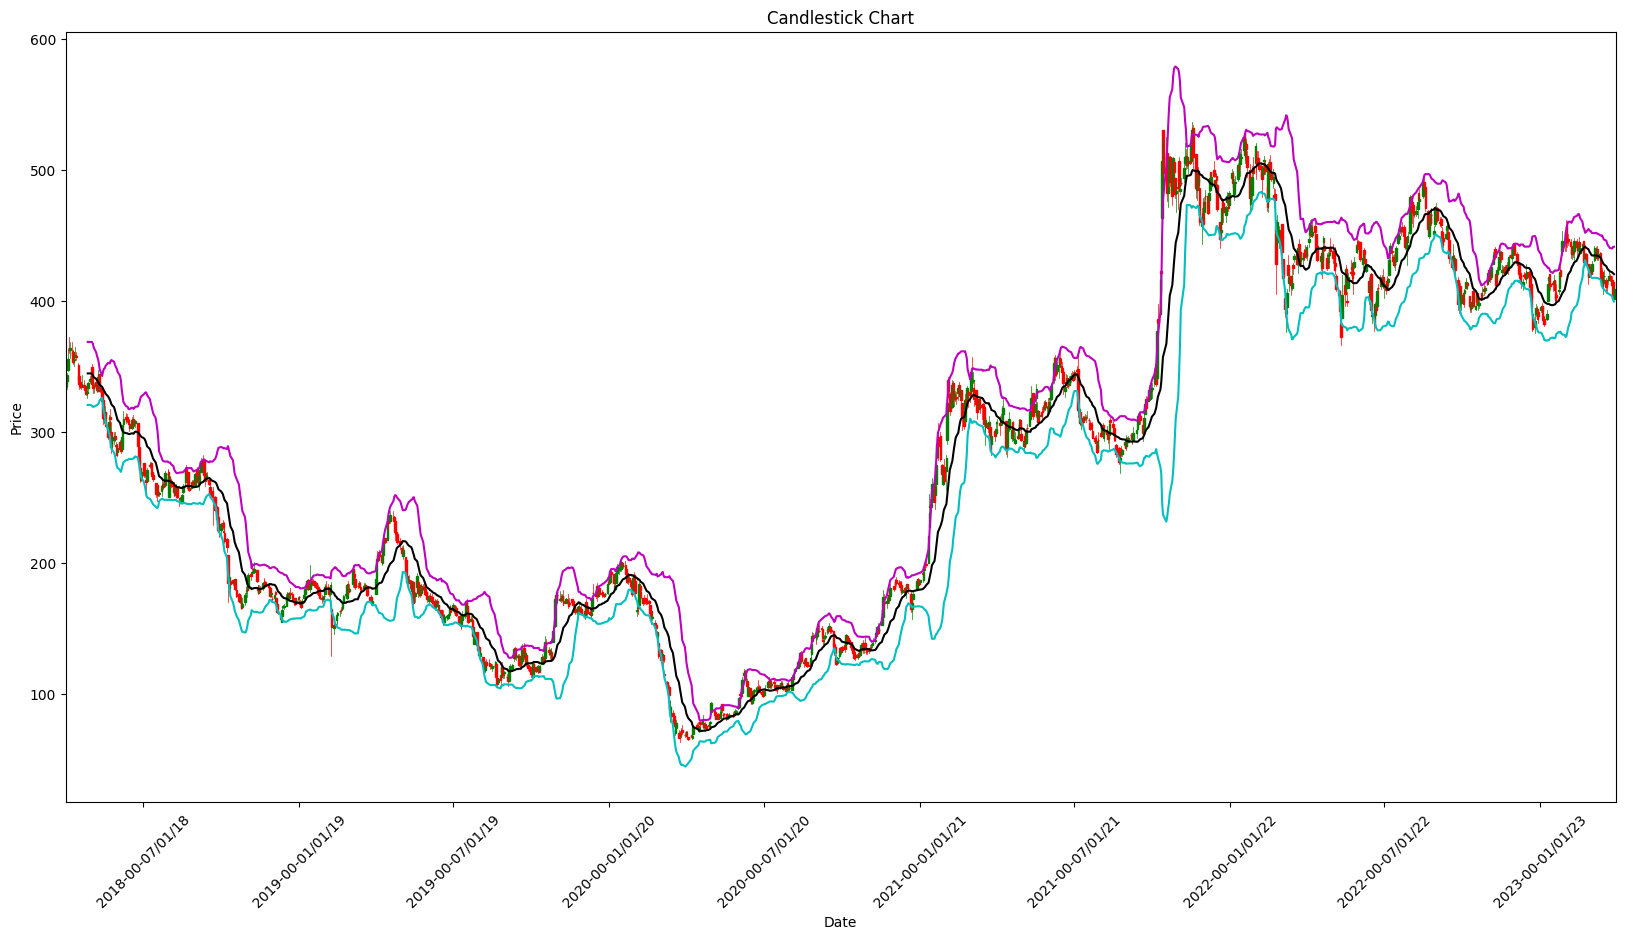

In [ ]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mdates.date2num)

fig, ax = plt.subplots(figsize=(20,10))

candlestick_ohlc(ax, df[['Date', 'Open', 'High', 'Low', 'Close']].values, width=2, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))

start_date = pd.to_datetime('2018-04-01')
end_date = pd.to_datetime('2023-03-31')
ax.set_xlim(start_date, end_date)

plt.xticks(rotation=45)

plt.plot(df.index,df['mavg'],color='k')
plt.plot(df.index,df['std+2'],color='m')
plt.plot(df.index,df['std-2'],color='c')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Chart')

plt.show()

In [ ]:
oversold = []
for i in range(1, len(df)):
    if (df['Low'].iloc[i]<df['std-2'].iloc[i]):
        oversold.append(i)

overbought = []
for i in range(1, len(df)):
    if (df['High'].iloc[i]>df['std+2'].iloc[i]):
        overbought.append(i)

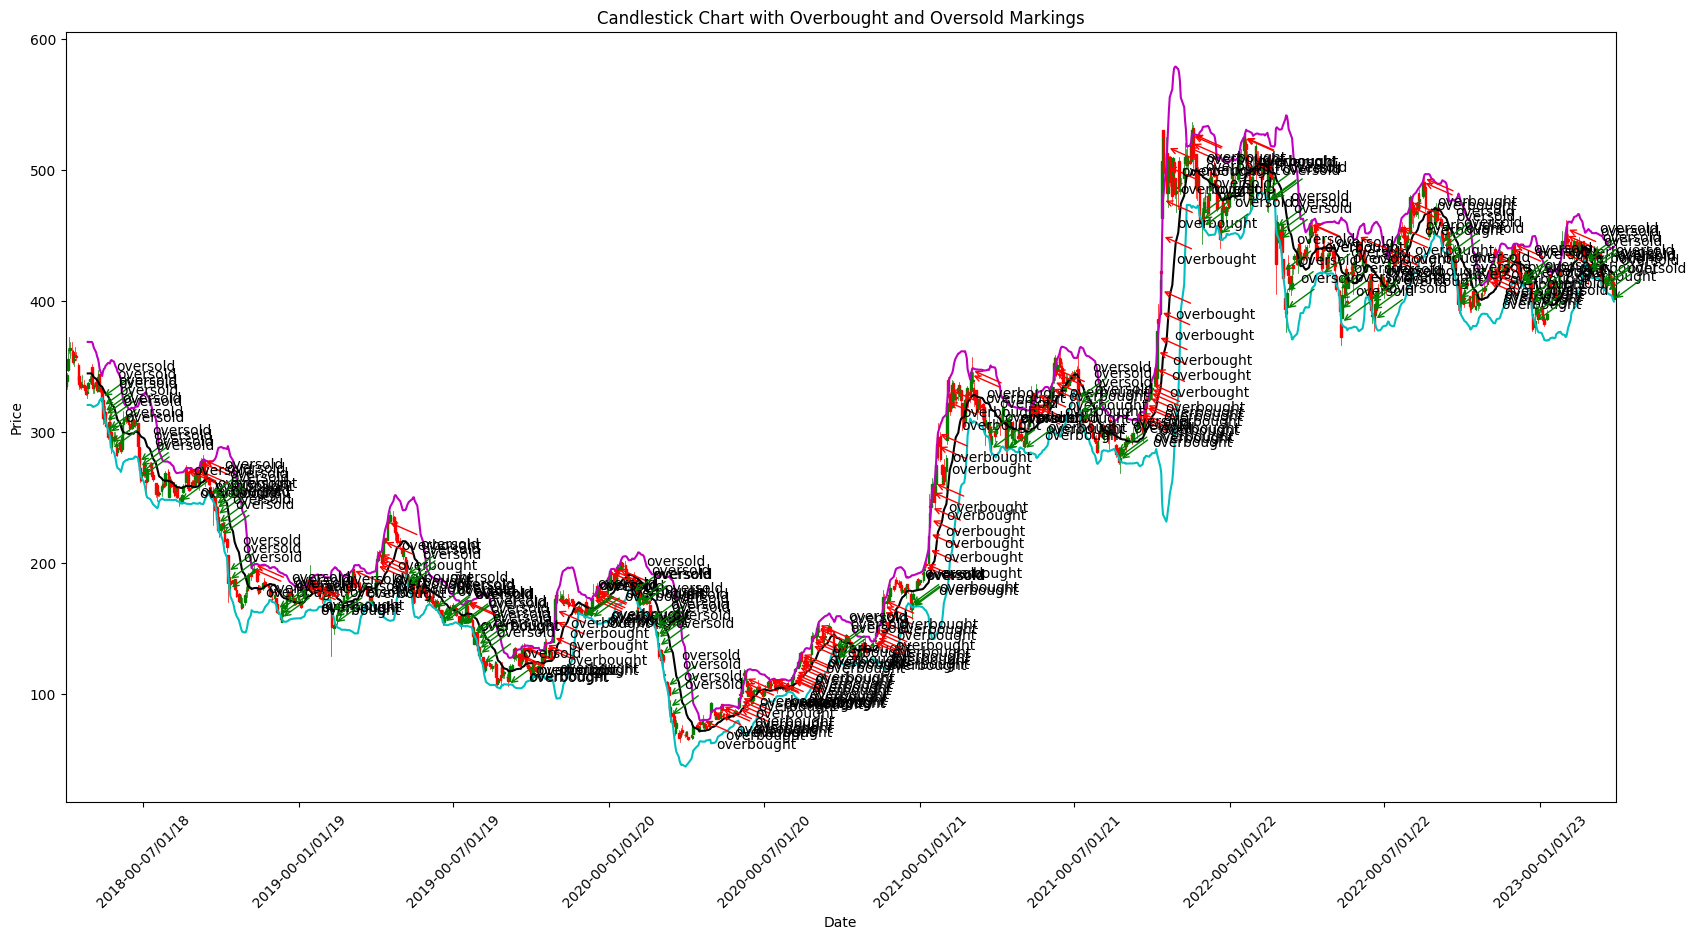

In [ ]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mdates.date2num)

fig, ax = plt.subplots(figsize=(20,10))

candlestick_ohlc(ax, df[['Date', 'Open', 'High', 'Low', 'Close']].values, width=2, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))

start_date = pd.to_datetime('2018-04-01')
end_date = pd.to_datetime('2023-03-31')
ax.set_xlim(start_date, end_date)

plt.xticks(rotation=45)

plt.plot(df.index,df['mavg'],color='k')
plt.plot(df.index,df['std+2'],color='m')
plt.plot(df.index,df['std-2'],color='c')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Chart with Overbought and Oversold Markings')

for i in overbought:
    ax.annotate('overbought', xy=(df['Date'].iloc[i], df['std+2'].iloc[i]), xytext=(10, -20),
                textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

for i in oversold:
    ax.annotate('oversold', xy=(df['Date'].iloc[i], df['std-2'].iloc[i]), xytext=(10, 20),
                textcoords='offset points', arrowprops=dict(arrowstyle='->', color='green'))

plt.show()

# Buy and Sell Signals

In [ ]:
sell_signals = []
buy_signals = []
signals = []

status = ''
for i in df.index:
    if (df['Low'][i]<df['std-2'][i]) and status != 'SELL':  #oversold bearish market
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif (df['High'][i]>df['std+2'][i]) and status != 'BUY':    #overbought bullish market
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, 'NONE'))

print(sell_signals)
print(buy_signals)
print(signals)

[datetime.date(2018, 5, 14), datetime.date(2018, 9, 18), datetime.date(2018, 12, 6), datetime.date(2019, 2, 8), datetime.date(2019, 5, 7), datetime.date(2019, 7, 25), datetime.date(2019, 12, 2), datetime.date(2020, 1, 28), datetime.date(2020, 9, 22), datetime.date(2020, 12, 21), datetime.date(2021, 3, 19), datetime.date(2021, 7, 6), datetime.date(2021, 11, 26), datetime.date(2022, 2, 8), datetime.date(2022, 4, 19), datetime.date(2022, 6, 14), datetime.date(2022, 9, 7), datetime.date(2022, 12, 8), datetime.date(2023, 2, 23)]
[datetime.date(2018, 8, 20), datetime.date(2018, 11, 6), datetime.date(2019, 1, 9), datetime.date(2019, 3, 5), datetime.date(2019, 7, 16), datetime.date(2019, 9, 11), datetime.date(2019, 12, 12), datetime.date(2020, 4, 20), datetime.date(2020, 11, 6), datetime.date(2021, 1, 6), datetime.date(2021, 5, 11), datetime.date(2021, 9, 15), datetime.date(2022, 1, 17), datetime.date(2022, 4, 5), datetime.date(2022, 5, 31), datetime.date(2022, 7, 7), datetime.date(2022, 10, 3

remaining capital = 9604737.240509033
current value = 9604737.240509033
returns = 92.09474481018067%
Sells=1125, Buys=1


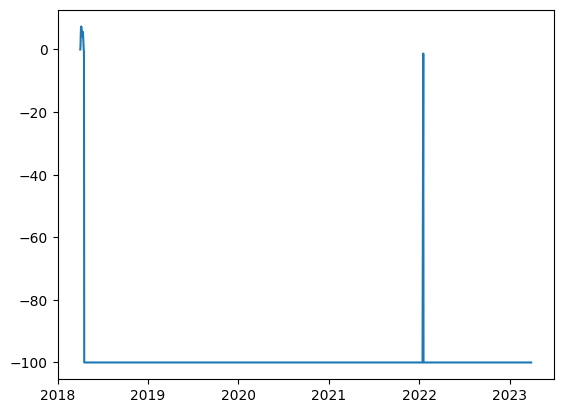

In [ ]:
capital = 1_00_00_000

n=capital // tatam_data['Close'][0]

capital -= n * tatam_data['Close'][0]
current_price=tatam_data['Close'][0]
index = []
returns = []
no_of_sell=0
no_of_buy=0
stop_loss=current_price*0.99     #keeping a 1% stoploss

for i in signals:
    if ((i[1] == 'SELL') or (tatam_data['Close'][i[0]]<stop_loss)):
        no_of_sell+=1
        capital += n * tatam_data['Close'][i[0]]
        n = 0
    elif (i[1] == 'BUY') :
        no_of_buy+=1
        n += capital // tatam_data['Close'][i[0]]
        capital -= n * tatam_data['Close'][i[0]]
        current_price=tatam_data['Close'][i[0]]
        stop_loss=current_price*0.99

    portfolio_value = n * tatam_data['Close'][i[0]]

    returns.append((((portfolio_value / 1_00_00_000) - 1) * 100))
    index.append(i[0])

current_value = n * tatam_data['Close'][-1] + capital
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 1_00_00_000 - 1) * 100}%")
print(f"Sells={no_of_sell}, Buys={no_of_buy}")
plt.plot(index, returns)

In [ ]:
sell_signals_final=[]
buy_signals_final=[]
signals_final=[]
for i in signals:
  if ((i[1]=='SELL') and ((i[0] in three_black_crows) or (i[0] in dark_cloud_cover) or (i[0] in bearish_engulfing))):
    sell_signals_final.append(i)
    signals_final.append((i[0],'SELLF'))
  elif ((i[1]=='BUY') and ((i[0] in three_white_soldiers) or (i[0] in piercing) or (i[0] in bullish_engulfing))):
    buy_signals_final.append(i)
    signals_final.append((i[0],'BUYF'))

In [ ]:
print(sell_signals_final)
print(buy_signals_final)
print(signals_final)

[(datetime.date(2018, 5, 14), 'SELL'), (datetime.date(2018, 12, 6), 'SELL'), (datetime.date(2019, 7, 25), 'SELL'), (datetime.date(2020, 1, 28), 'SELL'), (datetime.date(2020, 9, 22), 'SELL'), (datetime.date(2020, 12, 21), 'SELL'), (datetime.date(2022, 2, 8), 'SELL'), (datetime.date(2022, 4, 19), 'SELL'), (datetime.date(2022, 12, 8), 'SELL')]
[(datetime.date(2018, 8, 20), 'BUY'), (datetime.date(2019, 1, 9), 'BUY'), (datetime.date(2019, 7, 16), 'BUY'), (datetime.date(2019, 9, 11), 'BUY'), (datetime.date(2020, 11, 6), 'BUY'), (datetime.date(2021, 9, 15), 'BUY'), (datetime.date(2022, 4, 5), 'BUY')]
[(datetime.date(2018, 5, 14), 'SELLF'), (datetime.date(2018, 8, 20), 'BUYF'), (datetime.date(2018, 12, 6), 'SELLF'), (datetime.date(2019, 1, 9), 'BUYF'), (datetime.date(2019, 7, 16), 'BUYF'), (datetime.date(2019, 7, 25), 'SELLF'), (datetime.date(2019, 9, 11), 'BUYF'), (datetime.date(2020, 1, 28), 'SELLF'), (datetime.date(2020, 9, 22), 'SELLF'), (datetime.date(2020, 11, 6), 'BUYF'), (datetime.date

remaining capital = 8852036.118469238
current value = 8852036.118469238
returns = 77.04072236938477%
Sells=15, Buys=1


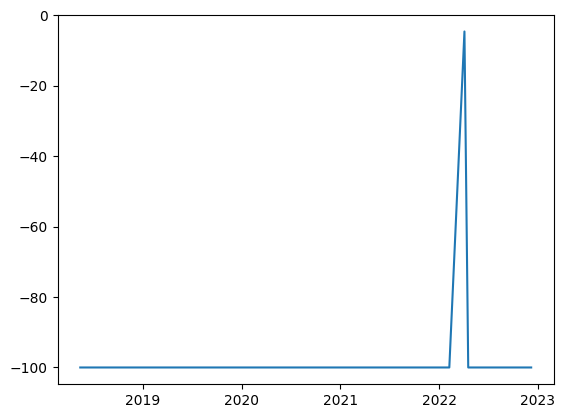

In [ ]:
capital = 1_00_00_000

n=capital // tatam_data['Close'][0]

capital -= n * tatam_data['Close'][0]
current_price=tatam_data['Close'][0]
index = []
returns = []
no_of_sell=0
no_of_buy=0
stop_loss=current_price*0.99

for i in signals_final:
    if ((i[1] == 'SELLF') or (tatam_data['Close'][i[0]]<stop_loss)):
        no_of_sell+=1
        capital += n * tatam_data['Close'][i[0]]
        n = 0
    elif ((i[1] == 'BUYF')):
        no_of_buy+=1
        n += capital // tatam_data['Close'][i[0]]
        capital -= n * tatam_data['Close'][i[0]]
        current_price=tatam_data['Close'][i[0]]
        stop_loss=current_price*0.99

    portfolio_value = n * tatam_data['Close'][i[0]]

    returns.append((((portfolio_value / 1_00_00_000) - 1) * 100))
    index.append(i[0])

current_value = n * tatam_data['Close'][-1] + capital
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 1_00_00_000 - 1) * 100}%")
print(f"Sells={no_of_sell}, Buys={no_of_buy}")
plt.plot(index, returns)